# Predicting Fine Art Photography: The Role of Depth and Contrast

#### Abstract
In this project, we aim to predict fine art photography by using the depth of the photographs. There is a widespread belief in contemporary art theories that the reason why artistic photography is impressive is the perception of depth it creates. It is believed that this specific perception is kind of technic that creates the beauty in fine art photography. The perception of the depth can be described by parameters such as contrast and sharpness.  At this initial step, we just started with the contrast of the photographs and tried to improve our prediction algorithm. Unfortunately, the results are not as good as expected. 

#### Aim
The main objective of the project is to illuminate the cultural, societal, psychological, and cognitive factors that shape our perception of fine art and normal photographs. To fulfill this task, we should formalize the factors that affect our perception of fine art photography. As mentioned above, the perception of depth is considered to be the thing that most affect our perception of fine art photography. In order to analyze deeply the perception of depth, we should be able to formalize it with objective parameters. The parameters such as contrast and sharpness were initially chosen to categorize the fine art photographs. However, at this initial step, we only use the contrast to see if we can get successful outcomes. As the art theories support, contrast is supposed to strengthen our perception of the depth. Thus, another main task is to improve the classification and prediction power of our algorithm by using contrast values. We make tests by using three different datasets and two different neural network models. The datasets consist of the dataset that involves general contrast values of the photographs, the dataset that involves regional contrast values of the photographs, and the standard dataset which involves the data from all channels. We basically compare the outcomes of these datasets and the neural network algorithms that are used in  classification and prediction. 

#### Method
As it is mentioned, we divide the task into three main parts. In the first part, we classify and predict the photographs by using a standard convolutional neural network (CNN) model. The first step, namely the Photography Dataset, is taken as an initial case which will be compared with the other two cases. Through this comparisons, we are planning to make inference about whether the contrast has a measurable impact on our perception of depth and fine art photography. The other datasets are Contrast Dataset and Regional Contrast Dataset. If Contrast Dataset and Regional Contrast Dataset give us better outcomes in terms of prediction accuracies, then we may reach the conclusion that the perception of depth, which can be measured by contrast, have a measurable effect on our perception of fine art photographs. 

#### Photography Dataset
This dataset is used to make a standard prediction by using standard technics and methods as it will be used make comparison with two other datasets, namely Contrast Dataset and Regional Contrast Dataset. The first thing to do is to create a new dataset by mixing two datasets: Magnum Photos Dataset for fine art photography and The Met Dataset for normal photographs. We choose 200 photographs from both datasets and create a new dataset named "photography" which consists of 400 photographs. After that, we need to reshape the image size. Since the most common shape among the new dataset is 400x600, we set the shape of the photographs as 400x600. In short, the root directory is named as "resized_mix". After that, we create a csv file based on our root directory "resized_mix" and we name it "photography.csv". To connect our root directory with the csv file, we define a Photography Dataset class. Photography Dataset class assures that the classification and prediction stages will be implemented accordingly. We split the train and test data by concerning the standards, 300 for training and 114 for testing, that is, 72% for training and 28% for testing. We define our CNN model to be compatible with 400x600 sized photographs. In this first step, we create two convolutional layers. We train based on the training set and test the data based on the test set. Finally, we plotted the losses and accuracies of our model based on our test set.

#### Contrast Dataset
The main difference between Contrast Dataset and Photography Dataset is that we use general contrast values of the photographs in Contrast Dataset. The general contrast values are collected via  gray level co-occurrence matrices (GLCM). GLCM properties is a very common method in texture analyze. In object detection, it may provide reliable outcomes and high accuracies based on its parameters. GLCM matrices provides different parameters yet we will only use the contrast. If we use contrast, it gives a 1x4 matrix for each photograph’s contrast value. That is, the contrast value of a photograph is represented by these 1x4 matrices. We define a function that finds the contrast matrices of photographs. Since the contrast matrices are one dimensional matrices, the prediction algorithm is designed to be implanted by means of a csv file. In this part, instead of the collocation of the root directory and the csv file, we use a csv file and a feed forward neural network in prediction. Thus, Contrast Dataset only refers to the csv file. Since the models such as perceptron, logistic regression, decision tree, random forest, etc. could not give better results, we choose to proceed with neural network. We use “BCEWithLogitsLoss” as the loss function and “Adam” as the optimizer because we get better results with the specific loss function and optimizer. 

#### Regional Contrast Dataset
There are two main difference between Contrast Dataset and Regional Contrast Dataset. Firstly, while we use general contrast values of the photographs in Contrast Dataset, the other dataset includes regional contrast values of each photographs. That is to say, we get a 15x10 matrix to represent the contrast value of a photograph. The other important difference between these two datasets is that we use standard deviation method to calculate the contact values. In order to create the 15x10 matrices, we define a function named “analyze_regions” that calculates the contrast values of specific group of pixels. This time, we create a dataset class which resembles the Photography dataset, but the difference is that the class only takes the information of the photographs as 15x10 matrices of contrast values. That is, the function “analyze_regions” is inside the dataset class. Another thing is that we use convolutional neural network to better classify the two dimensional contrast values. We use CrossEntrpyLoss as our Loss function and ASGD as optimizer. 

#### Results
We get the average accuracy of 64.76% and average loss of 0.48% from the first dataset. From the Contrast dataset, we get the  average accuracy of 50.14% and average loss of 0.66%. Lastly, from the Regional Contrast Dataset, we get the average accuracy of 58.33% and average loss of 0.69%. The accuracy and loss  values per epoch can be seen in the graphs below. 

#### Conclusion 
The results are obviously do not meet our expectations. There are several reasons for this. Firstly and most importantly, we work on a small dataset consisted of 414 photographs which diminish the prediction power of the three different algorithms. If we take our first dataset case, Photography Dataset, the accuracy score over 60% can be considered as a good starting point. This means that there is a measurable difference between fine art photography and normal photographs. However, neither the second dataset nor the last one give better accuracy and loss scores than the first one. The second reason for disappointing results is that by taking contrast values as smaller matrices such as 1x4 and 15x10 we collect less data for our prediction algorithm. That is, in the second and the third case, there are less data to process. One should not expect an algorithm get successful results based on very few data. This is partly because our photographs have lower image quality. That is, thirdly, our photographs have the lower image quality, and the low quality decreases the contrast information that we get from photographs. However, the regional contrast dataset are promising and open to improvement, since there is a considerable difference between the accuracy score of the Contrast Dataset and Regional Contrast Dataset.  

#### References:
Carter, D., Some Important Principles of Photography. pp. 2. Booklet #3, The Northern Virginia Alliance of Camera Clubs, 2009

Horng, M. H., Texture Feature Coding Method for Texture Analysis and It’s Application. Journal of Optical Engineering, 42 ,1, pp. 228-238. 2003

Moulden, B., Kingdom F., Gatlet, L. F., The Standard Deviation of Luminance as a Metric for   Contrast in Random-Dot Images. Perception, vol. 19, pp. 79-101. February, 1990

Riyadi, T., Setiawan, P. A., Visual Depth of Landscape Photography into Digital Illustration, pp. 188. In Proceedings of the 3rd International Conference on Social Sciences, Laws, Arts and Humanities, 2022

Weber, E. A., Vision Composition and Photography. pp. 56. Walter de Gruyter, Berlin, New York, 1980


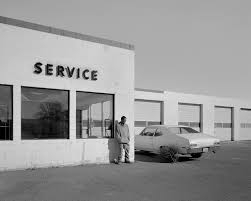


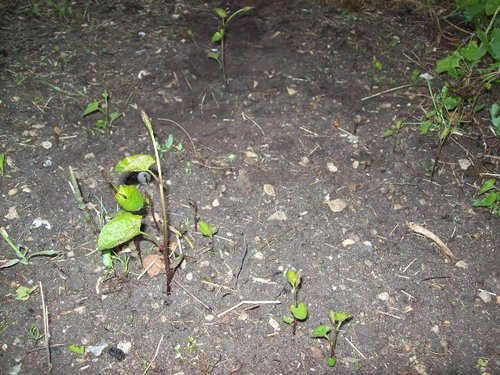

Let us start with importing required libraries

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.datasets as dsets
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
#from customdataset import PhotographyDataset
import random
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import os
import csv
from skimage import io
from skimage.io import imread, imshow
import io
import cv2
import imageio.v2 as imageio
import torchvision
from torchvision import datasets, models, transforms

## Creating Labeled CSV File

In [2]:
directory = 'photography'
subdirs = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
print(subdirs)
# "0" for The Met Dataset and "1" for fine art photography dataset

['0', '1']


Let us create a labeled csv file based on our root directory.

In [3]:
with open('photography.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Filename', 'Subfolder'])
    for subdir in subdirs:
        subdir_path = os.path.join('photography', subdir)
        for filename in os.listdir(subdir_path):
            writer.writerow([filename, subdir])

Now, we have a csv file which is composed of labeled data. We labeled regular photographs as "0" and fine art photography as "1".

In [4]:
df = pd.read_csv('photography.csv')
df.rename(columns={'Filename': 'images', 'Subfolder': 'labels'}, inplace=True)
df.to_csv('photography.csv', index=None)
pd.read_csv('photography.csv')

,images,labels
0,00c7f8740f79.jpg,0
1,0a868ff32175.jpg,0
2,0b6e4d5e2291.jpg,0
3,0c18373fb90e.jpg,0
4,0f50b1ff6d90.jpg,0
...,...,...
410,par71887-photographer-featured.jpg,1
411,nn11520004-photographer-featured.jpg,1
412,par116712-photographer-featured.jpg,1
413,par351013-601x400.jpg,1


## Connecting Root Directory to Csv File

To bind the root directory and the csv file, let us define a PhotographyDataset class.

In [5]:
class PhotographyDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform = None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transforms.Compose([transforms.ToTensor()])
        ###
        self.annotations = self.annotations[~self.annotations['images'].str.endswith('.DS_Store')]
        ###
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        images = imageio.imread(img_path)
        labels = torch.tensor(int(self.annotations.iloc[index, 1]))    
        if self.transform:
            images = self.transform(images)
        return images, labels  

In [6]:
dataset = PhotographyDataset(csv_file = "photography.csv", root_dir = "resized_mix", transform = transforms.ToTensor())

num_classes = 2
batch_size = 10
num_epochs = 10
learning_rate = 0.001

trainset, testset = torch.utils.data.random_split(dataset, [300, 114])
trainloader = DataLoader(dataset = trainset, batch_size = batch_size, shuffle = True)
testloader = DataLoader(dataset = testset, batch_size = batch_size, shuffle = True)

In [7]:
batch_index = 1
images_batch = None
labels_batch = None
for i, (images, labels) in enumerate(trainloader):
    if i == batch_index:
        images_batch = images
        labels_batch = labels
        break

print(f"Images size: {images_batch.size()}")
print(f"Labels size: {labels_batch.size()}")
print("Images:")
print(images_batch)
print("Labels:")
print(labels_batch)


Images size: torch.Size([10, 3, 400, 600])
Labels size: torch.Size([10])
Images:
tensor([[[[0.0902, 0.0902, 0.0902,  ..., 0.0118, 0.0118, 0.0078],
          [0.1059, 0.1020, 0.0902,  ..., 0.0157, 0.0118, 0.0078],
          [0.1255, 0.1176, 0.1059,  ..., 0.0157, 0.0078, 0.0039],
          ...,
          [0.0157, 0.0118, 0.0078,  ..., 0.0588, 0.0706, 0.0902],
          [0.0314, 0.0235, 0.0196,  ..., 0.1412, 0.1569, 0.1765],
          [0.0510, 0.0392, 0.0353,  ..., 0.1608, 0.1451, 0.1608]],

         [[0.0902, 0.0863, 0.0824,  ..., 0.0196, 0.0118, 0.0078],
          [0.1059, 0.0980, 0.0902,  ..., 0.0235, 0.0118, 0.0078],
          [0.1294, 0.1176, 0.1059,  ..., 0.0235, 0.0078, 0.0039],
          ...,
          [0.0431, 0.0314, 0.0275,  ..., 0.0039, 0.0235, 0.0431],
          [0.0431, 0.0353, 0.0235,  ..., 0.0941, 0.1098, 0.1373],
          [0.0588, 0.0471, 0.0353,  ..., 0.1137, 0.1059, 0.1216]],

         [[0.0588, 0.0706, 0.0941,  ..., 0.0157, 0.0196, 0.0157],
          [0.0745, 0.0824, 

In [8]:
trainset[1]

(tensor([[[0.1961, 0.2549, 0.3804,  ..., 0.2745, 0.2078, 0.1686],
          [0.2549, 0.2784, 0.3294,  ..., 0.1686, 0.1608, 0.1608],
          [0.2471, 0.2431, 0.2431,  ..., 0.0863, 0.0980, 0.1137],
          ...,
          [0.1647, 0.1608, 0.1490,  ..., 0.1490, 0.1490, 0.1451],
          [0.1098, 0.1098, 0.1137,  ..., 0.1608, 0.1569, 0.1490],
          [0.1098, 0.1137, 0.1255,  ..., 0.1725, 0.1647, 0.1569]],
 
         [[0.2549, 0.3137, 0.4392,  ..., 0.3216, 0.2549, 0.2157],
          [0.3137, 0.3373, 0.3882,  ..., 0.2157, 0.2078, 0.2078],
          [0.3059, 0.3020, 0.3020,  ..., 0.1412, 0.1529, 0.1686],
          ...,
          [0.1569, 0.1529, 0.1412,  ..., 0.2980, 0.2980, 0.2941],
          [0.1255, 0.1255, 0.1255,  ..., 0.3059, 0.3059, 0.2980],
          [0.1451, 0.1490, 0.1608,  ..., 0.3176, 0.3137, 0.3059]],
 
         [[0.1333, 0.1843, 0.3098,  ..., 0.2275, 0.1608, 0.1216],
          [0.1922, 0.2157, 0.2588,  ..., 0.1216, 0.1137, 0.1137],
          [0.1922, 0.1882, 0.1804,  ...,

## Defining CNN Model

We define CNN class to be compatible with the 400x600 size photographs.

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(480000, 64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = torch.flatten(x, start_dim=1)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

## Training The Dataset

In [8]:
#model = models.resnet18() accuracy = 68%
#model = models.alexnet()

learning_rate = 0.0001
num_epochs = 10
#Choosing Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# Making Lists for PyPlot
losses = []
accuracies = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Classify with training dataset
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1

        if iter % 50 == 0:
            # Predict with test dataset
            correct_acc = 0
            total_acc = 0
            running_loss = 0
            total_loss = 0
            with torch.no_grad():
                for images, labels in testloader:
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total_acc += labels.size(0)
                    correct_acc += (predicted == labels).sum().item()
                    running_loss += loss.item()
                    
                # Collecting the elements of the Lists for PyPlot    
                accuracy = 100 * correct_acc / total_acc
                running_loss = running_loss / len(testloader)
                losses.append(running_loss)
                accuracies.append(accuracy)
                print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, running_loss, accuracy))


Iteration: 50. Loss: 0.7498050928115845. Accuracy: 64.03508771929825
Iteration: 100. Loss: 0.6516795754432678. Accuracy: 71.9298245614035
Iteration: 150. Loss: 0.6894213557243347. Accuracy: 63.1578947368421
Iteration: 200. Loss: 0.34753531217575073. Accuracy: 71.05263157894737
Iteration: 250. Loss: 0.15647704899311066. Accuracy: 59.64912280701754
Iteration: 300. Loss: 0.3439549207687378. Accuracy: 58.771929824561404


In [9]:
print('Average accuracy is {}'.format(sum(accuracies)/len(accuracies)))
print('Average loss is {}'.format(sum(losses)/len(losses)))

Average accuracy is 64.76608187134504
Average loss is 0.4898122176527977


## Plotting The Initial Results

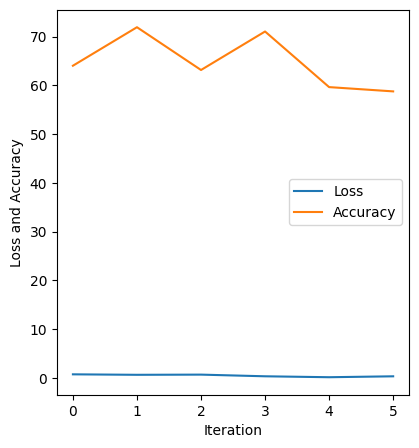

Accuracy on the test dataset is 58.77%.


In [10]:
# Plot the losses and accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()

print(f'Accuracy on the test dataset is {accuracy:.2f}%.')

## Using GLCM Properties To Calculate Contrast Values

GLCM properties is a very common method in texture analyze. In object detection, it may provide reliable outcomes and high accuracies based on its parameters.

In [10]:
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color
import cv2
import skimage.feature as feature
from PIL import Image


def find_contrast(image_location):
    # Load the image
    image = cv2.imread(image_location)
    # Convert from BGR to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert from BGR to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert from RGB to another color space, e.g., HSV
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    gray_cont = feature.graycomatrix(gray_image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)
    
    # Find the GLCM properties
    contrast = feature.graycoprops(gray_cont, 'contrast')
    
    #contrast = contrast.astype(np.float32)
    #print(gray_image.shape)
    #print(rgb_image.shape)
    #print(hsv_image.shape)
    
    return contrast.flatten()

We only use the contrast values in our prediction. It gives the matrices similar to this:

In [11]:
find_contrast("resized_contrast/0/0a0b0fd535f9.jpg")

array([266.5593823 , 487.49819457, 377.96032581, 542.47685575])

In [14]:
directory = 'resized_contrast'
subdirs = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
print(subdirs)
# "0" for The Met Dataset and "1" for fine art photography dataset

['0', '1']


Now, we create a csv file based on the contrast values of each photographs.

In [23]:
with open('photography_contrast.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Contrast', 'Subfolder'])
    for subdir in subdirs:
        subdir_path = os.path.join('resized_contrast', subdir)
        for filename in os.listdir(subdir_path):
            #print('{}/{}'.format(subdir_path, filename))
            if filename.endswith(".DS_Store"):
                continue
            writer.writerow([find_contrast('{}/{}'.format(subdir_path, filename)), subdir])

In [24]:
df = pd.read_csv('photography_contrast.csv')
df.rename(columns={'Contrast': 'contrasts', 'Subfolder': 'labels'}, inplace=True)
df.to_csv('photography_contrast.csv', index=None)
pd.read_csv('photography_contrast.csv')

,contrasts,labels
0,[ 672.86163606 1006.74751988 465.97439014 95...,0
1,[177.30721619 252.00693303 108.52482038 271.10...,0
2,[493.38744992 598.35116171 188.77828739 609.22...,0
3,[524.3547788 974.10456023 569.20404344 833.31...,0
4,[123.35066361 234.12827561 130.05243943 225.07...,0
...,...,...
408,[123.24941152 453.0360124 358.09731412 451.89...,1
409,[285.3152212 537.89266991 387.46286967 555.83...,1
410,[ 20.98680718 117.22987352 82.21155806 82.92...,1
411,[ 73.57259599 119.45200648 70.74953634 103.54...,1


This time we will make predictions only based on the csv file. Thus, let us create a dataset without a root directory. 

In [25]:
class ContrastDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.data['contrasts'] = self.data['contrasts'].apply(lambda x: [float(value) for value in x.strip('[]').split()])
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        contrasts = torch.tensor(self.data.loc[index, 'contrasts'], dtype=torch.float32)
        labels = torch.tensor(self.data.loc[index, 'labels'], dtype=torch.float32)

        if self.transform:
            contrasts = self.transform(contrasts)

        return contrasts, labels

In [27]:
dataset2 = ContrastDataset(csv_file = "photography_contrast.csv", transform = None)

num_classes = 2
batch_size = 10
num_epochs = 10
learning_rate = 0.001

trainset2, testset2 = torch.utils.data.random_split(dataset2, [300, 113])
trainloader2 = DataLoader(dataset = trainset2, batch_size = batch_size, shuffle = True)
testloader2 = DataLoader(dataset = testset2, batch_size = batch_size, shuffle = True)

In [28]:
testset2[10]

(tensor([ 31.1225, 122.3524, 103.1674, 120.3726]), tensor(0.))

Now, sine we have one dimensional matrices and since we use only a csv file in prediction, it is better not to use CNN. Instead we use a standard neural network in prediction. 

In [29]:
import torch.nn as nn
# number of features (len of X cols)
input_dim = 4
# number of hidden layers
hidden_layers = 500
hidden_layers2 = 200

# number of classes (unique of y)
output_dim = 1
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_layers)
        self.linear2 = nn.Linear(hidden_layers, hidden_layers2)
        self.linear3 = nn.Linear(hidden_layers2, output_dim)
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

model = Network()

In [30]:
learning_rate = 0.001
num_epochs = 10
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []
accuracies = []

iter = 0
for epoch in range(num_epochs):
    for i, (contrasts, labels) in enumerate(trainloader2):
        optimizer.zero_grad()
        contrasts = contrasts.float()
        labels = labels.float().unsqueeze(1)
        outputs = model(contrasts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1

        if iter % 50 == 0:
            correct_acc = 0
            total_acc = 0
            running_loss = 0
            total_loss = 0
            with torch.no_grad():
                for contrasts, labels in testloader2:
                    contrasts = contrasts.float()
                    labels = labels.float().unsqueeze(1)
                    outputs = model(contrasts)
                    predicted = torch.round(torch.sigmoid(outputs))
                    total_acc += labels.size(0)
                    correct_acc += (predicted == labels).sum().item()
                    running_loss += loss.item()

            accuracy = 100 * correct_acc / total_acc
            running_loss = running_loss / len(testloader2)
            losses.append(running_loss)
            accuracies.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, running_loss, accuracy))

Iteration: 50. Loss: 0.697862982749939. Accuracy: 48.67256637168141
Iteration: 100. Loss: 0.7209411859512329. Accuracy: 48.67256637168141
Iteration: 150. Loss: 0.6451941728591919. Accuracy: 55.75221238938053
Iteration: 200. Loss: 0.6438969373703003. Accuracy: 52.21238938053097
Iteration: 250. Loss: 0.5969613790512085. Accuracy: 47.78761061946903
Iteration: 300. Loss: 0.6753025054931641. Accuracy: 47.78761061946903


In [31]:
print('Average accuracy is {}'.format(sum(accuracies)/len(accuracies)))
print('Average loss is {}'.format(sum(losses)/len(losses)))

Average accuracy is 50.14749262536873
Average loss is 0.6633598605791727


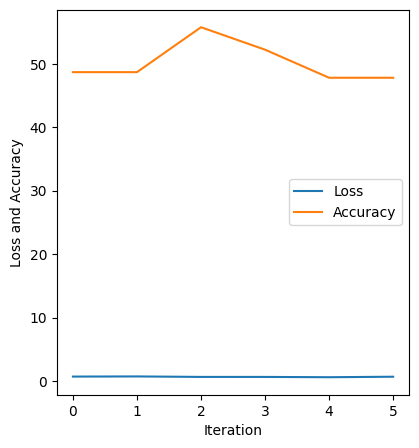

Accuracy on the test dataset is 47.79%.


In [32]:
# Plot the losses and accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()

print(f'Accuracy on the test dataset is {accuracy:.2f}%.')

## Regional Contrast Dataset

At this part, we will define a new function that calculates the contrast and another function that uses the calculate_contrast function over the groups of regions in 400x600 photographs.  

In [10]:
import cv2
import numpy as np

def calculate_contrast(image):
    contrast = np.std(image)
    return contrast

"""
def calculate_sharpness(image):
    gradient_magnitude = cv2.Laplacian(image, cv2.CV_64F).var()
    return gradient_magnitude
"""

def analyze_regions(image_path, num_regions):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    assert not isinstance(image,type(None))
    height, width = image.shape

    region_height = height // num_regions
    region_width = width // num_regions

    contrast_values = np.zeros((region_height, region_width))
    #sharpness_values = np.zeros((region_height, region_width))

    for i in range(region_height):
        for j in range(region_width):
            region = image[i*region_height:(i+1)*region_height, j*region_width:(j+1)*region_width]
            contrast_values[i][j] = calculate_contrast(region)
            #sharpness_values[i][j] = calculate_sharpness(region)
            #contrast_values = contrast_values.flatten()
            #contrast_values = contrast_values.shape

    return contrast_values

It gives the matrices similar to this:

In [11]:
path = 'resized_contrast/0/0c18373fb90e.jpg'
reg = 40 
cont = analyze_regions(path, reg)
print("The shape of the matrices:")
print(cont.shape)
print("Contrast Values:")
print(cont)

The shape of the matrices:
(10, 15)
Contrast Values:
[[23.88337962 21.18011226 31.70096669 38.35278115 21.16053875 19.44848923
  22.47632236 18.76176845 47.70111622 26.26       32.12935038 41.2375751
  56.59940361 27.48446026 36.49539149]
 [29.10764772 20.49448273 39.9002289  25.36440288 15.89504605 22.48074336
  25.73644541 22.25987921 49.54278241 37.44424952 41.91157305 44.31536929
  41.68886662 28.84841917 46.46511762]
 [26.43066905 20.90691008 29.10854857 28.73772666 18.51629913 29.90594515
  24.63640035 25.62717741 18.38275158 25.00532921 42.88858745 56.28134445
  34.37095415 27.97642579 38.27052768]
 [22.21287815 26.71568495 40.37570722 30.27639785 34.13227928 22.34395867
  16.45409642 19.3977788  23.13047533 23.63441558 45.82950287 34.58360819
  37.80428018 28.53645544 39.48375137]
 [37.77833359 41.45219254 21.08016445 42.30025795 42.57427705 16.24742715
  21.09277812 34.13635143 23.68450877 27.03390135 42.62282591 37.45189566
  36.44227155 39.78466986 48.8227183 ]
 [10.93721273

In [484]:
df = pd.read_csv('photography.csv')
df

,images,labels
0,00c7f8740f79.jpg,0
1,0a868ff32175.jpg,0
2,0b6e4d5e2291.jpg,0
3,0c18373fb90e.jpg,0
4,0f50b1ff6d90.jpg,0
...,...,...
410,par71887-photographer-featured.jpg,1
411,nn11520004-photographer-featured.jpg,1
412,par116712-photographer-featured.jpg,1
413,par351013-601x400.jpg,1


Let us connect our root directory to our csv file by creating a dataset class and defining it accordingly. 

In [485]:
class PhotographyDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform = None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transforms.Compose([transforms.ToTensor()])
        ###
        self.annotations = self.annotations[~self.annotations['images'].str.endswith('.DS_Store')]
        ###
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        #images = imageio.imread(img_path)
        images = analyze_regions(img_path, num_regions)
        labels = torch.tensor(int(self.annotations.iloc[index, 1]))    
        if self.transform:
            images = self.transform(images)
        return images, labels  
    
num_regions = 40

In [486]:
dataset = PhotographyDataset(csv_file = "photography.csv", root_dir = "resized_mix", transform = transforms.ToTensor())

num_classes = 2
batch_size = 10
num_epochs = 10
learning_rate = 0.001

trainset, testset = torch.utils.data.random_split(dataset, [300, 114])
trainloader = DataLoader(dataset = trainset, batch_size = batch_size, shuffle = True)
testloader = DataLoader(dataset = testset, batch_size = batch_size, shuffle = True)


Now, since we have a two dimensional matrices, let us use a CNN model and choose the most efficient loss function and optimizer in prediction. 

In [487]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(384, 16)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = x.float()
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = torch.flatten(x, start_dim=1)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

In [488]:
learning_rate = 0.0001
num_epochs = 10
#Choosing Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)
# Making Lists for PyPlot
losses = []
accuracies = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Classify with training dataset
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1

        if iter % 50 == 0:
            # Predict with test dataset
            correct_acc = 0
            total_acc = 0
            running_loss = 0
            total_loss = 0
            with torch.no_grad():
                for images, labels in testloader:
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total_acc += labels.size(0)
                    correct_acc += (predicted == labels).sum().item()
                    running_loss += loss.item()
                    
                # Collecting the elements of the Lists for PyPlot    
                accuracy = 100 * correct_acc / total_acc
                running_loss = running_loss / len(testloader)
                losses.append(running_loss)
                accuracies.append(accuracy)
                print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, running_loss, accuracy))


Iteration: 50. Loss: 0.7404064536094666. Accuracy: 53.50877192982456
Iteration: 100. Loss: 0.7395936846733093. Accuracy: 57.01754385964912
Iteration: 150. Loss: 0.6338651180267334. Accuracy: 58.771929824561404
Iteration: 200. Loss: 0.7062230110168457. Accuracy: 62.280701754385966
Iteration: 250. Loss: 0.6786180138587952. Accuracy: 57.89473684210526
Iteration: 300. Loss: 0.6988903284072876. Accuracy: 60.526315789473685


In [489]:
print('Average accuracy is {}'.format(sum(accuracies)/len(accuracies)))
print('Average loss is {}'.format(sum(losses)/len(losses)))

Average accuracy is 58.33333333333334
Average loss is 0.699599434932073


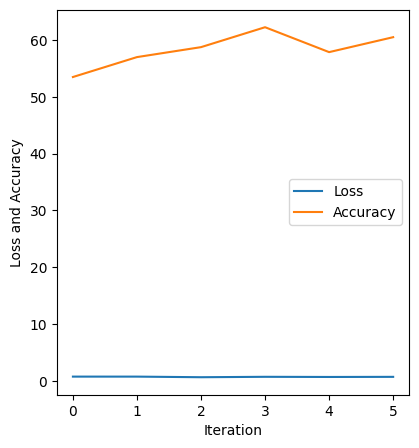

Accuracy on the test dataset is 60.53%.


In [490]:
# Plot the losses and accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss and Accuracy')
plt.legend()
plt.show()

print(f'Accuracy on the test dataset is {accuracy:.2f}%.')